# P5 Segmentez des clients d'un site e-commerce

![alt text](DataBase_SQL.png "Title")



In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from datetime import datetime
sns.set_theme(style="darkgrid")


# Importation

In [2]:
dataset_list = [
    'olist_order_reviews_dataset.csv.zip',
    'olist_customers_dataset.csv.zip',
    'olist_geolocation_dataset.csv.zip',
    'olist_order_items_dataset.csv.zip',
    'olist_order_payments_dataset.csv.zip'  ,
    'olist_orders_dataset.csv.zip',
    'olist_products_dataset.csv.zip',
    'olist_sellers_dataset.csv',
    'product_category_name_translation.csv'
]

data_name_list = [
    'order_reviews',
    'customers',
    'geolocalisation',
    'order_items',
    'order_payments',
    'orders',
    'products',
    'sellers',
    'translation'
]

data =   {key : pd.read_csv(path) for key,path in zip(data_name_list, dataset_list)}


In [3]:
data['products']

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0
...,...,...,...,...,...,...,...,...,...
32946,a0b7d5a992ccda646f2d34e418fff5a0,moveis_decoracao,45.0,67.0,2.0,12300.0,40.0,40.0,40.0
32947,bf4538d88321d0fd4412a93c974510e6,construcao_ferramentas_iluminacao,41.0,971.0,1.0,1700.0,16.0,19.0,16.0
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,cama_mesa_banho,50.0,799.0,1.0,1400.0,27.0,7.0,27.0
32949,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,60.0,156.0,2.0,700.0,31.0,13.0,20.0


In [4]:
data['sellers']

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP
...,...,...,...,...
3090,98dddbc4601dd4443ca174359b237166,87111,sarandi,PR
3091,f8201cab383e484733266d1906e2fdfa,88137,palhoca,SC
3092,74871d19219c7d518d0090283e03c137,4650,sao paulo,SP
3093,e603cf3fec55f8697c9059638d6c8eb5,96080,pelotas,RS


# Exploration

In [5]:
data['order_reviews']

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53
...,...,...,...,...,...,...,...
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,2018-07-07 00:00:00,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09 00:00:00,2017-12-11 20:06:42
99221,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excelente mochila, entrega super rápida. Super...",2018-03-22 00:00:00,2018-03-23 09:10:43
99222,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,NaN,NaN,2018-07-01 00:00:00,2018-07-02 12:59:13


In [6]:
data['order_reviews']['review_comment_message'].isna().mean()

0.5870253164556962

## Clients
    on a un client unique par ligne dans le dataframe customers

In [7]:
# Nb de clients uniques == Nb de lignes ? , Combien ?
data['customers']['customer_id'].nunique() ==  data['customers'].shape[0] , data['customers']['customer_id'].nunique()

(True, 99441)

In [8]:
# Pourcentage de clients par ville, Sao Paulo en tête suivit de Rio de Janeiro
data['customers']['customer_city'].value_counts(normalize=True)

sao paulo            0.156274
rio de janeiro       0.069207
belo horizonte       0.027886
brasilia             0.021430
curitiba             0.015296
                       ...   
bequimao             0.000010
andarai              0.000010
vargem grande        0.000010
curvelandia          0.000010
eugenio de castro    0.000010
Name: customer_city, Length: 4119, dtype: float64

#### Mais un client peut avoir plusieurs commandes dans le dataframe *orders*

In [9]:
data['orders']

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00


# Order items 
    Nous donne ID des produits, le prix , freight_value == frais de transport/perte transport

In [10]:
print(data['order_items'].columns)

Index(['order_id', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value'],
      dtype='object')


In [11]:
data['order_items'].describe()

,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


# Order Payments

In [12]:
data['order_payments']

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45
...,...,...,...,...,...
103881,0406037ad97740d563a178ecc7a2075c,1,boleto,1,363.31
103882,7b905861d7c825891d6347454ea7863f,1,credit_card,2,96.80
103883,32609bbb3dd69b3c066a6860554a77bf,1,credit_card,1,47.77
103884,b8b61059626efa996a60be9bb9320e10,1,credit_card,5,369.54


# Jointure

    Dans un premier temps
    
    On laisse de cotès les tables 
    - reviews : commentaires (en portugais brésilien), 58 % de NA 
    - sellers : les vendeurs, on a déjà la catégories des biens, à voir dans un second temps la pertience de cette table 
    - geolocalisation : on déjà les villes des clients, surplus d'information ?
    
    On sélectionne ainsi : 
    - orders : date de livraison, date d'achat
    - payments : type de paiement, valeurs
    - customers : ID client, localisation
    - items : prix, valeur de fret/transport
    - Products : catégorie, dimension(poids, largeur, longeur...) 
    

In [13]:
# On a order_id pour orders, order_payments,order_items
data['orders'].columns, data['order_payments'].columns, data['order_items'].columns

(Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
        'order_approved_at', 'order_delivered_carrier_date',
        'order_delivered_customer_date', 'order_estimated_delivery_date'],
       dtype='object'),
 Index(['order_id', 'payment_sequential', 'payment_type',
        'payment_installments', 'payment_value'],
       dtype='object'),
 Index(['order_id', 'order_item_id', 'product_id', 'seller_id',
        'shipping_limit_date', 'price', 'freight_value'],
       dtype='object'))

# Mise à jour df  

In [14]:
data['orders'].shape[0],data['order_payments'].shape[0],data['order_items'].shape[0]

(99441, 103886, 112650)

In [15]:
data['orders']['order_id'].nunique()

99441

In [16]:
data['order_items']['order_id'].nunique()

98666

In [17]:
data['orders']['order_status'].value_counts()

delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: order_status, dtype: int64

In [18]:
pd.Series(data['order_items']['order_id'].unique()).isin(data['orders']['order_id']).sum()

98666

In [19]:
order = data['order_items'].groupby('order_id')['price'].sum().to_frame().reset_index()

In [20]:
order_2 = order.merge(data['orders'], on ='order_id',how='left')[['order_id',
                                                       'price',
                                                       'customer_id',
                                                       'order_delivered_customer_date',
       ]]

In [21]:
order_3 = order_2.merge(data['customers'][['customer_id','customer_unique_id']],on='customer_id',how='left')

In [22]:
review_2 =  data['order_reviews'].groupby('order_id')['review_score'].mean().to_frame().reset_index()

In [23]:
order_4 = order_3.merge(review_2,on='order_id', how='left')

In [24]:
order_4

,order_id,price,customer_id,order_delivered_customer_date,customer_unique_id,review_score
0,00010242fe8c5a6d1ba2dd792cb16214,58.90,3ce436f183e68e07877b285a838db11a,2017-09-20 23:43:48,871766c5855e863f6eccc05f988b23cb,5.0
1,00018f77f2f0320c557190d7a144bdd3,239.90,f6dd3ec061db4e3987629fe6b26e5cce,2017-05-12 16:04:24,eb28e67c4c0b83846050ddfb8a35d051,4.0
2,000229ec398224ef6ca0657da4fc703e,199.00,6489ae5e4333f3693df5ad4372dab6d3,2018-01-22 13:19:16,3818d81c6709e39d06b2738a8d3a2474,5.0
3,00024acbcdf0a6daa1e931b038114c75,12.99,d4eb9395c8c0431ee92fce09860c5a06,2018-08-14 13:32:39,af861d436cfc08b2c2ddefd0ba074622,4.0
4,00042b26cf59d7ce69dfabb4e55b4fd9,199.90,58dbd0b2d70206bf40e62cd34e84d795,2017-03-01 16:42:31,64b576fb70d441e8f1b2d7d446e483c5,5.0
...,...,...,...,...,...,...
98661,fffc94f6ce00a00581880bf54a75a037,299.99,b51593916b4b8e0d6f66f2ae24f2673d,2018-05-10 22:56:40,0c9aeda10a71f369396d0c04dce13a64,5.0
98662,fffcd46ef2263f404302a634eb57f7eb,350.00,84c5d4fbaf120aae381fad077416eaa0,2018-07-23 20:31:55,0da9fe112eae0c74d3ba1fe16de0988b,5.0
98663,fffce4705a9662cd70adb13d4a31832d,99.90,29309aa813182aaddc9b259e31b870e6,2017-10-28 12:22:22,cd79b407828f02fdbba457111c38e4c4,5.0
98664,fffe18544ffabc95dfada21779c9644f,55.99,b5e6afd5a41800fdf401e0272ca74655,2017-08-16 21:59:40,eb803377c9315b564bdedad672039306,5.0


In [25]:
data['customers'][['customer_id',]]

,customer_id
0,06b8999e2fba1a1fbc88172c00ba8bc7
1,18955e83d337fd6b2def6b18a428ac77
2,4e7b3e00288586ebd08712fdd0374a03
3,b2b6027bc5c5109e529d4dc6358b12c3
4,4f2d8ab171c80ec8364f7c12e35b23ad
...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f
99437,e7b71a9017aa05c9a7fd292d714858e8
99438,5e28dfe12db7fb50a4b2f691faecea5e
99439,56b18e2166679b8a959d72dd06da27f9


In [26]:
# jointure entre orders,order_payments et order_items par clé primaire : order_id
df_orders = (
    data['orders'].merge(
    data['order_payments'].merge(data['order_items'])
)
)
df_orders

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,credit_card,1,18.12,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,3,voucher,1,2.00,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,2,voucher,1,18.59,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1,boleto,1,141.46,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,1,credit_card,3,179.12,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117596,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00,1,credit_card,3,195.00,1,f1d4ce8c6dd66c47bbaa8c6781c2a923,1f9ab4708f3056ede07124aad39a2554,2018-02-12 13:10:37,174.90,20.10
117597,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00,1,credit_card,5,271.01,1,b80910977a37536adeddd63663f916ad,d50d79cb34e38265a8649c383dcffd48,2017-09-05 15:04:16,205.99,65.02
117598,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00,1,credit_card,4,441.16,1,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,2018-01-12 21:36:21,179.99,40.59
117599,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00,1,credit_card,4,441.16,2,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,2018-01-12 21:36:21,179.99,40.59


In [27]:
# jointure entre df_orders et les tables products et customers
df = data['products'].merge(df_orders.merge(data['customers']))
df.columns

Index(['product_id', 'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'payment_sequential', 'payment_type', 'payment_installments',
       'payment_value', 'order_item_id', 'seller_id', 'shipping_limit_date',
       'price', 'freight_value', 'customer_unique_id',
       'customer_zip_code_prefix', 'customer_city', 'customer_state'],
      dtype='object')

In [28]:
df['product_photos_qty'].value_counts() # Nombre de photos par produits ?

1.0     58539
2.0     22896
3.0     12920
4.0      8830
5.0      5585
6.0      3935
7.0      1556
8.0       772
10.0      353
9.0       318
11.0       73
12.0       60
13.0       30
15.0       12
17.0       11
14.0        6
18.0        4
19.0        2
20.0        1
Name: product_photos_qty, dtype: int64

# Méthode RFM
    - Récence : ex :  moins d’un mois, entre 1 et 5 mois, entre 5 et 10 mois, plus de 10 mois…
    - Fréquence : ex : moins de 2 achats, entre 2 et 5 achats, plus de 5 achats…
    - Montant : ex : moins de 20 euros, de 20 à 50 euros, de 50 à 100 euros, plus de 100 euros…

## Nombre de jours entre aujourd'hui et le dernier achat

In [29]:
df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp']).astype('datetime64[D]')

df['nb_days'] = (datetime.now() - df['order_purchase_timestamp']).astype('timedelta64[D]')

In [30]:
df['nb_days']

0         1861.0
1         1944.0
2         1785.0
3         1760.0
4         1874.0
           ...  
117596    1972.0
117597    1910.0
117598    1910.0
117599    1910.0
117600    1796.0
Name: nb_days, Length: 117601, dtype: float64

In [31]:
df[['customer_unique_id','order_purchase_timestamp']]

,customer_unique_id,order_purchase_timestamp
0,b1a1199364a4a7fe27c4486ab63f550d,2018-04-24
1,4b86049cb99e4aa774031daa9cd18f18,2018-01-31
2,f63805d9c7edb84d92413af34b86a39c,2018-07-09
3,619e926d09b26efbd5180368b1ddc874,2018-08-03
4,ad353b4fb0e294adc4eda48af73e68a6,2018-04-11
...,...,...
117596,4d1bbadcfd9bdc738e54599627870319,2018-01-03
117597,2cc893f1618b7317170ba2456cf76117,2018-03-06
117598,2cc893f1618b7317170ba2456cf76117,2018-03-06
117599,2cc893f1618b7317170ba2456cf76117,2018-03-06


In [32]:
df[['payment_value','price','freight_value']]

,payment_value,price,freight_value
0,18.30,10.91,7.39
1,265.99,248.00,17.99
2,87.62,79.80,7.82
3,121.84,112.30,9.54
4,46.19,37.90,8.29
...,...,...,...
117596,92.02,29.90,16.11
117597,159.54,29.90,23.28
117598,159.54,29.90,23.28
117599,159.54,29.90,23.28


In [33]:
rfm = df.groupby('customer_unique_id').agg({'nb_days' : np.min, 
                                      'order_purchase_timestamp' : len,
                                      'payment_value' : np.sum
                                     }).reset_index()

rfm = rfm.rename(columns={'nb_days' : 'r', # récence
            'order_purchase_timestamp' : 'f', # fréquence
            'payment_value' : 'm' }) # montant
rfm

,customer_unique_id,r,f,m
0,0000366f3b9a7992bf8c76cfdf3221e2,1845.0,1,141.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1848.0,1,27.19
2,0000f46a3911fa3c0805444483337064,2271.0,1,86.22
3,0000f6ccb0745a6a4b88665a16c9f078,2055.0,1,43.62
4,0004aac84e0df4da2b147fca70cf8255,2022.0,1,196.89
...,...,...,...,...
95414,fffcf5a5ff07b0908bd4e2dbc735a684,2181.0,2,4134.84
95415,fffea47cd6d3cc0a88bd621562a9d061,1996.0,1,84.58
95416,ffff371b4d645b6ecea244b27531430a,2302.0,1,112.46
95417,ffff5962728ec6157033ef9805bacc48,1853.0,1,133.69


In [34]:
rfm.isna().sum()

customer_unique_id    0
r                     0
f                     0
m                     0
dtype: int64

### 85 % des clients consomment un seul bien

In [35]:
round(rfm.f.value_counts(normalize=True).head(10),4)*100

1     84.98
2     11.16
3      2.03
4      0.95
5      0.33
6      0.29
7      0.08
8      0.04
12     0.03
10     0.02
Name: f, dtype: float64

In [36]:
rfm.m.value_counts().tail(20)

262.33     1
220.18     1
543.84     1
225.68     1
1823.24    1
181.03     1
483.81     1
246.53     1
484.69     1
403.69     1
147.03     1
626.97     1
385.32     1
697.58     1
413.08     1
616.56     1
420.76     1
517.95     1
614.49     1
4134.84    1
Name: m, dtype: int64

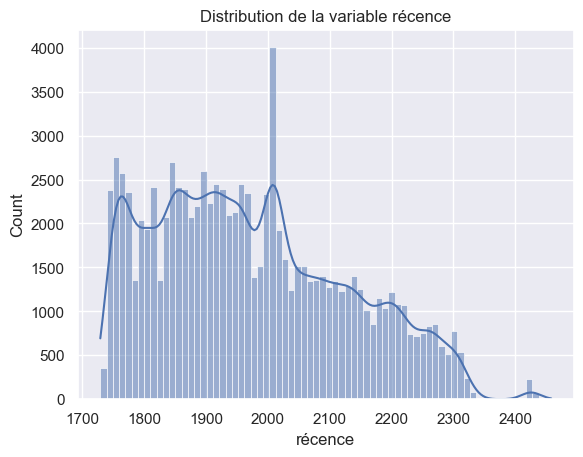

In [37]:
sns.histplot(data = rfm, x = "r" , kde=True)
plt.title('Distribution de la variable récence')
plt.xlabel('récence')
plt.show()

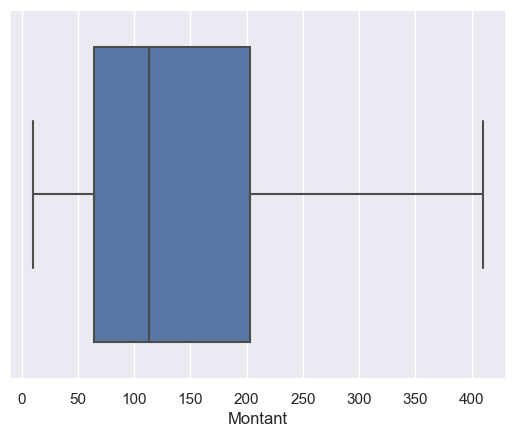

In [38]:
sns.boxplot(data= rfm, x='m', showfliers = False)
plt.title('')
plt.xlabel('Montant')
plt.show()

In [39]:
rfm.describe()

,r,f,m
count,95419.000000,95419.000000,95419.000000
mean,1972.496484,1.232469,212.831142
std,153.153950,0.823064,641.763082
min,1729.000000,1.000000,9.590000
25%,1848.000000,1.000000,63.910000
50%,1953.000000,1.000000,113.150000
75%,2082.000000,1.000000,202.545000
max,2458.000000,75.000000,109312.640000


In [40]:
# Score par quantile
rfm['rq'] = pd.cut(rfm.r,bins=np.quantile(rfm.r, q = [0,0.33,0.66,1]),labels=['2','1','0'])#.astype('str')

rfm['fq'] = pd.cut(rfm.f, bins= [0,1,2,100], labels=['0','1','2'])#.astype('str')

rfm['mq'] = pd.cut(rfm.m,bins=np.quantile(rfm.m, q = [0,0.33,0.66,1]),labels=['0','1','2'])#.astype('str')

rfm =  rfm.dropna()

rfm[['rq','fq','mq']] =  rfm[['rq','fq','mq']].astype('str')

# rfm['rq'] = rfm['rq'].astype('str')
# rfm['fq'] = rfm['fq'].astype('str')
# rfm['mq'] = rfm['mq'].astype('str')


# Score composite
rfm['score'] = rfm['rq'] + rfm['fq'] + rfm['mq']

rfm

C:\Users\Hankour\AppData\Local\Temp\ipykernel_8836\1830547920.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rfm[['rq','fq','mq']] =  rfm[['rq','fq','mq']].astype('str')
C:\Users\Hankour\AppData\Local\Temp\ipykernel_8836\1830547920.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rfm['score'] = rfm['rq'] + rfm['fq'] + rfm['mq']


,customer_unique_id,r,f,m,rq,fq,mq,score
0,0000366f3b9a7992bf8c76cfdf3221e2,1845.0,1,141.90,2,0,1,201
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1848.0,1,27.19,2,0,0,200
2,0000f46a3911fa3c0805444483337064,2271.0,1,86.22,0,0,1,001
3,0000f6ccb0745a6a4b88665a16c9f078,2055.0,1,43.62,0,0,0,000
4,0004aac84e0df4da2b147fca70cf8255,2022.0,1,196.89,0,0,2,002
...,...,...,...,...,...,...,...,...
95414,fffcf5a5ff07b0908bd4e2dbc735a684,2181.0,2,4134.84,0,1,2,012
95415,fffea47cd6d3cc0a88bd621562a9d061,1996.0,1,84.58,1,0,1,101
95416,ffff371b4d645b6ecea244b27531430a,2302.0,1,112.46,0,0,1,001
95417,ffff5962728ec6157033ef9805bacc48,1853.0,1,133.69,2,0,1,201


In [41]:
rfm.loc[
    (rfm['score'] == '21nan') |
    (rfm['score'] == 'nan12')
]

,customer_unique_id,r,f,m,rq,fq,mq,score


In [42]:
rfm.score.value_counts()

000    10381
100    10190
200     9795
201     9789
001     9755
101     9377
202     7391
002     7264
102     7146
112     2513
212     2490
012     2456
222     1099
122     1039
022     1037
011      878
211      722
111      696
010      355
110      280
210      260
021      124
020       90
121       78
120       75
221       75
220       62
Name: score, dtype: int64

In [43]:
rfm.score.nunique() 

27

In [44]:
rfm.score.value_counts().head()

000    10381
100    10190
200     9795
201     9789
001     9755
Name: score, dtype: int64

In [45]:
rfm.isna().sum()

customer_unique_id    0
r                     0
f                     0
m                     0
rq                    0
fq                    0
mq                    0
score                 0
dtype: int64

In [46]:
rfm.describe()

,r,f,m
count,95417.000000,95417.000000,95417.000000
mean,1972.501493,1.232453,212.832013
std,153.151645,0.823065,641.769353
min,1734.000000,1.000000,10.070000
25%,1848.000000,1.000000,63.910000
50%,1953.000000,1.000000,113.150000
75%,2082.000000,1.000000,202.540000
max,2458.000000,75.000000,109312.640000


## Passage en log 
    transformer les variables en log pour avoir une distribution moins étirée

In [47]:
rfm['log_r'] = np.log(rfm.r)
rfm['log_f'] = np.log(rfm.f)
rfm['log_m'] = np.log(rfm.m)

rfm

C:\Users\Hankour\AppData\Local\Temp\ipykernel_8836\3741027231.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rfm['log_r'] = np.log(rfm.r)
C:\Users\Hankour\AppData\Local\Temp\ipykernel_8836\3741027231.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rfm['log_f'] = np.log(rfm.f)
C:\Users\Hankour\AppData\Local\Temp\ipykernel_8836\3741027231.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the c

,customer_unique_id,r,f,m,rq,fq,mq,score,log_r,log_f,log_m
0,0000366f3b9a7992bf8c76cfdf3221e2,1845.0,1,141.90,2,0,1,201,7.520235,0.000000,4.955123
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1848.0,1,27.19,2,0,0,200,7.521859,0.000000,3.302849
2,0000f46a3911fa3c0805444483337064,2271.0,1,86.22,0,0,1,001,7.727976,0.000000,4.456902
3,0000f6ccb0745a6a4b88665a16c9f078,2055.0,1,43.62,0,0,0,000,7.628031,0.000000,3.775516
4,0004aac84e0df4da2b147fca70cf8255,2022.0,1,196.89,0,0,2,002,7.611842,0.000000,5.282645
...,...,...,...,...,...,...,...,...,...,...,...
95414,fffcf5a5ff07b0908bd4e2dbc735a684,2181.0,2,4134.84,0,1,2,012,7.687539,0.693147,8.327204
95415,fffea47cd6d3cc0a88bd621562a9d061,1996.0,1,84.58,1,0,1,101,7.598900,0.000000,4.437698
95416,ffff371b4d645b6ecea244b27531430a,2302.0,1,112.46,0,0,1,001,7.741534,0.000000,4.722598
95417,ffff5962728ec6157033ef9805bacc48,1853.0,1,133.69,2,0,1,201,7.524561,0.000000,4.895524


# RFM + satisfaction client

In [48]:
reviews = df.merge(
    data['order_reviews'][['order_id','review_score']],
    on = 'order_id',
    how= 'left'

)

reviews = reviews.loc[~reviews['review_score'].isna()].copy()

reviews = reviews.groupby('customer_unique_id')['review_score'].mean().to_frame().reset_index().copy()

reviews.head()
#reviews.groupby('customer_unique_id')['review_score'].mean().shape

,customer_unique_id,review_score
0,0000366f3b9a7992bf8c76cfdf3221e2,5.0
1,0000b849f77a49e4a4ce2b2a4ca5be3f,4.0
2,0000f46a3911fa3c0805444483337064,3.0
3,0000f6ccb0745a6a4b88665a16c9f078,4.0
4,0004aac84e0df4da2b147fca70cf8255,5.0


In [49]:
rfm_reviews = rfm.merge(
    reviews,
    on = 'customer_unique_id',
    how= 'left'

)

# df['col1'] =  df['col1'].fillna(df['col1'].mode()[0])
# Imputation par le mode 

mode = rfm_reviews.review_score.mode()[0]

rfm_reviews['review_score'] = rfm_reviews['review_score'].fillna(mode)

rfm_reviews.isna().mean()

customer_unique_id    0.0
r                     0.0
f                     0.0
m                     0.0
rq                    0.0
fq                    0.0
mq                    0.0
score                 0.0
log_r                 0.0
log_f                 0.0
log_m                 0.0
review_score          0.0
dtype: float64

In [50]:
rfm_reviews.review_score.mode()[0]

5.0

In [51]:
rfm_reviews

,customer_unique_id,r,f,m,rq,fq,mq,score,log_r,log_f,log_m,review_score
0,0000366f3b9a7992bf8c76cfdf3221e2,1845.0,1,141.90,2,0,1,201,7.520235,0.000000,4.955123,5.0
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1848.0,1,27.19,2,0,0,200,7.521859,0.000000,3.302849,4.0
2,0000f46a3911fa3c0805444483337064,2271.0,1,86.22,0,0,1,001,7.727976,0.000000,4.456902,3.0
3,0000f6ccb0745a6a4b88665a16c9f078,2055.0,1,43.62,0,0,0,000,7.628031,0.000000,3.775516,4.0
4,0004aac84e0df4da2b147fca70cf8255,2022.0,1,196.89,0,0,2,002,7.611842,0.000000,5.282645,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
95412,fffcf5a5ff07b0908bd4e2dbc735a684,2181.0,2,4134.84,0,1,2,012,7.687539,0.693147,8.327204,5.0
95413,fffea47cd6d3cc0a88bd621562a9d061,1996.0,1,84.58,1,0,1,101,7.598900,0.000000,4.437698,4.0
95414,ffff371b4d645b6ecea244b27531430a,2302.0,1,112.46,0,0,1,001,7.741534,0.000000,4.722598,5.0
95415,ffff5962728ec6157033ef9805bacc48,1853.0,1,133.69,2,0,1,201,7.524561,0.000000,4.895524,5.0


In [52]:
rfm_reviews['review_score'].round(1).value_counts()

5.0    55267
4.0    18275
1.0    10304
3.0     7819
2.0     2965
4.5      228
3.5      119
3.7       60
2.5       58
4.7       51
4.3       45
2.3       42
4.8       23
4.2       23
1.7       13
1.5       13
3.3       12
3.2       11
2.7       10
3.4       10
3.8        9
4.4        8
2.6        7
2.8        5
1.6        5
1.8        4
1.3        4
1.9        4
2.2        4
3.1        3
4.1        3
4.6        3
2.4        3
4.9        2
3.6        2
3.9        1
1.4        1
1.2        1
Name: review_score, dtype: int64

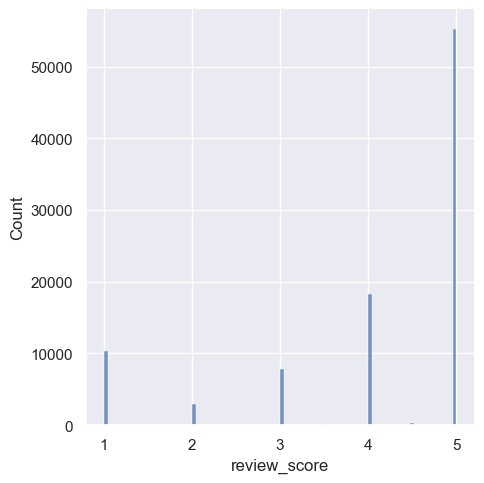

In [53]:
sns.displot(x=rfm_reviews['review_score'])

plt.show()

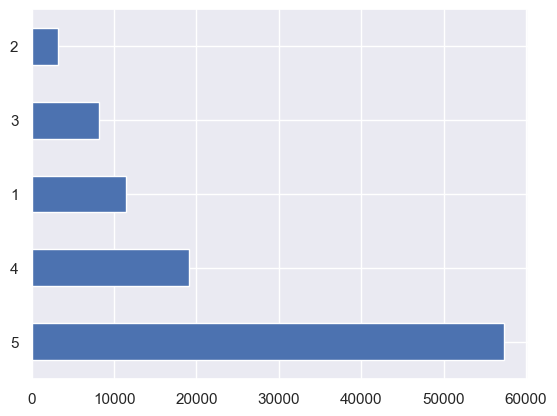

In [54]:
data['order_reviews'].review_score.value_counts().plot(kind='barh')
plt.show()

In [55]:
# sns.displot(rfm, x="log_m", hue="log_r")

# plt.show()


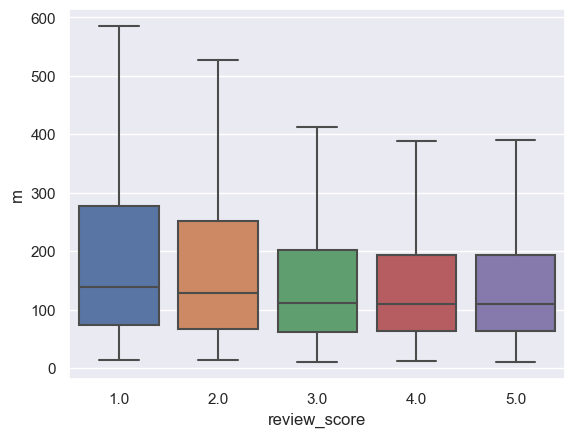

In [56]:
sns.boxplot(data=rfm_reviews.round(0), x='review_score', y='m',showfliers=False)
plt.show()

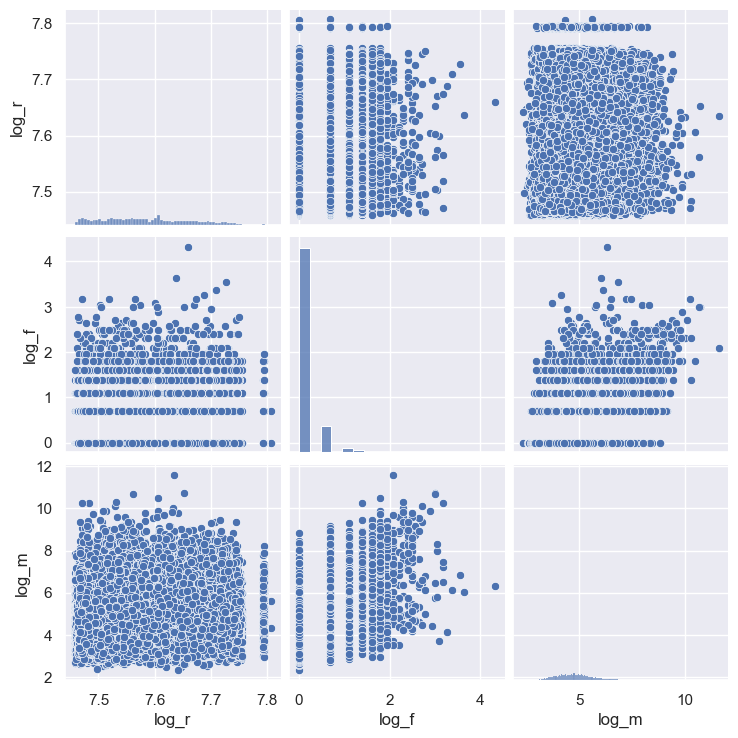

In [57]:
sns.pairplot(rfm[['log_r','log_f','log_m']])

plt.show()

In [58]:
rfm_reviews.describe()

,r,f,m,log_r,log_f,log_m,review_score
count,95417.000000,95417.000000,95417.000000,95417.000000,95417.000000,95417.000000,95417.000000
mean,1972.501493,1.232453,212.832013,7.584093,0.129081,4.802822,4.108841
std,153.151645,0.823065,641.769353,0.076700,0.332974,0.916200,1.324066
min,1734.000000,1.000000,10.070000,7.458186,0.000000,2.309561,1.000000
25%,1848.000000,1.000000,63.910000,7.521859,0.000000,4.157476,4.000000
50%,1953.000000,1.000000,113.150000,7.577122,0.000000,4.728714,5.000000
75%,2082.000000,1.000000,202.540000,7.641084,0.000000,5.310937,5.000000
max,2458.000000,75.000000,109312.640000,7.807103,4.317488,11.601967,5.000000


# Export rfm_reviews

In [59]:
rfm_reviews.to_pickle("rfm_reviews.pkl")
rfm_reviews.to_csv('rfm_reviews.csv')

#### Test lecture pickle

In [60]:
pd.read_pickle('rfm_reviews.pkl')

,customer_unique_id,r,f,m,rq,fq,mq,score,log_r,log_f,log_m,review_score
0,0000366f3b9a7992bf8c76cfdf3221e2,1845.0,1,141.90,2,0,1,201,7.520235,0.000000,4.955123,5.0
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1848.0,1,27.19,2,0,0,200,7.521859,0.000000,3.302849,4.0
2,0000f46a3911fa3c0805444483337064,2271.0,1,86.22,0,0,1,001,7.727976,0.000000,4.456902,3.0
3,0000f6ccb0745a6a4b88665a16c9f078,2055.0,1,43.62,0,0,0,000,7.628031,0.000000,3.775516,4.0
4,0004aac84e0df4da2b147fca70cf8255,2022.0,1,196.89,0,0,2,002,7.611842,0.000000,5.282645,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
95412,fffcf5a5ff07b0908bd4e2dbc735a684,2181.0,2,4134.84,0,1,2,012,7.687539,0.693147,8.327204,5.0
95413,fffea47cd6d3cc0a88bd621562a9d061,1996.0,1,84.58,1,0,1,101,7.598900,0.000000,4.437698,4.0
95414,ffff371b4d645b6ecea244b27531430a,2302.0,1,112.46,0,0,1,001,7.741534,0.000000,4.722598,5.0
95415,ffff5962728ec6157033ef9805bacc48,1853.0,1,133.69,2,0,1,201,7.524561,0.000000,4.895524,5.0
